In [1]:
import networkx as nx
#from igraph import Graph
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


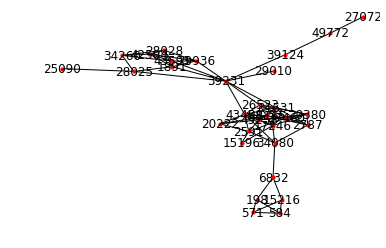

In [2]:
G=nx.read_edgelist("ego250.list",nodetype=int)
G.remove_node(250)
scc = sorted(nx.connected_components(G), key = len, reverse=True)
for cc in scc[1:]:
    for n in cc:
        G.remove_node(n)
nx.draw_networkx(G, with_labels=True,node_size=10)
plt.axis('off')
plt.show()

### Communities

* Group which is more connected to itself than to the rest
* Group of items which are more similar to each other than to the rest of the system.

#### Communities, Partioning:
* Strict partitioning clustering: each object belongs to exactly one cluster
* Overlapping clustering: each objact may belong to more clusters
* Hierarchical clustering: objects that belong to a child cluster also belong to the parent cluster
* Outliers: which do not conform to an expected pattern

#### Methods
* <b>Minimal cut</b>: cut the network into two, penalize different size and number of links cut
* <b>Hierarchical clustering</b>: Aggregate similar (or close) structures into groups successively based on similarity (or distance)
* <b>Girvan–Newman algorithm</b> (Modularity): Maximize a modularity which measures the difference of the in-community links and the out-community links
* <b>Statistical inference</b>: fit a generative model to the network data
* <b>Clique percolation</b>: communities are parts which can be covered by $k$-full graphs

## Girvan Newman method
Communities at different levels

In [3]:
communities_generator = nx.algorithms.community.girvan_newman(G)
top = next(communities_generator)
first = next(communities_generator)
second = next(communities_generator)
print(len(top),len(first),len(second))
print(second)

2 3 4
({198, 584, 15216, 6832, 571}, {25090, 1891, 43591, 42504, 29936, 29010, 34260, 28025, 28028, 39231}, {34080, 43458, 2787, 48165, 20380, 49258, 31631, 17246, 37460, 26523, 15196, 20222, 2591}, {27072, 39124, 49772})


#### In the last level all nodes are separate clusters

In [4]:
communities_generator = nx.algorithms.community.girvan_newman(G)
comm_level = []
for l in communities_generator:
    comm_level.append(l)
print(comm_level[-1])

({198}, {571}, {584}, {6832}, {1891}, {2591}, {2787}, {15196}, {15216}, {17246}, {20222}, {20380}, {25090}, {26523}, {27072}, {28025}, {28028}, {29010}, {29936}, {31631}, {34080}, {34260}, {37460}, {39124}, {39231}, {42504}, {43458}, {43591}, {48165}, {49258}, {49772})


#### Plot the network colored by community

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


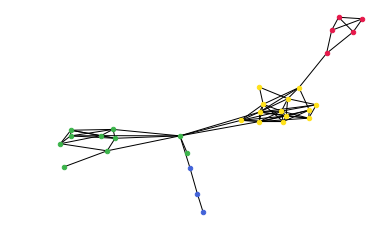

In [5]:
colorlist = ['#e6194b','#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', \
             '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', \
             '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', \
             '#000000']
level = comm_level[2]
pos = nx.spring_layout(G)
for i in range(len(level)):
    nx.draw_networkx_nodes(G,pos,nodelist=list(level[i]),node_size=20,\
                           node_color=colorlist[i % (len(colorlist))])
nx.draw_networkx_edges(G,pos,edgelist=G.edges())
plt.axis('off')
plt.show()

### Hierarchical clustering

1. Define a norm between nodes $d(a,b)$
2. At the beginning each node is a separate cluster
3. Merge the two closest clusters into one
4. Repeat 3.

#### Norm between clusters $||A-B||$
* Maximum or complete linkage clustering:
$$\max\{d(a,b):a\in A,b\in B\}$$
* Minimum or single-linkage clustering:
$$\min\{d(a,b):a\in A,b\in B\}$$
* Mean or average linkage clustering:
$$\frac{1}{||A||\,||B||}\sum_{a\in A}\sum_{b \in B} d(a,b)$$
#### Represent hierarchical clustering
* Dendogram

<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/11/clustergram.png">

### Read dendograms
<img src="https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/11/dendrogram2.png">
* Leaves A, B, and C are more similar to each other than they are to leaves D, E, or F.
* Leaves D and E are more similar to each other than they are to leaves A, B, C, or F.
* Leaf F is substantially different from all of the other leaves.

In [6]:
cities = []
with open('towns.csv') as f:
    for line in f:
        if line[0] != '#':
            cities.append(line.split()[0])
        else:
            months = line.split()[1:]
print(cities)
print(months)

['Tallinn', 'Beijing', 'Berlin', 'Buenos_Aires', 'Cairo', 'Cape_Town', 'Helsinki', 'London', 'Moscow', 'Ottawa', 'Paris', 'Riga', 'Rome', 'Singapore', 'Stockholm', 'Waschington_D.C.']
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


In [7]:
import numpy as np
csv = np.genfromtxt ('towns.csv', delimiter=" ")[:,1:]
print(csv)

[[ -3.  -5.  -1.   3.  10.  13.  16.  15.  10.   6.   1.  -2.]
 [ -3.   0.   6.  13.  20.  24.  26.  25.  20.  13.   5.  -1.]
 [  0.  -1.   4.   7.  12.  16.  18.  17.  14.   9.   4.   1.]
 [ 23.  22.  20.  16.  13.  10.  10.  11.  13.  16.  18.  22.]
 [ 13.  15.  17.  21.  25.  27.  28.  27.  26.  23.  19.  15.]
 [ 21.  21.  20.  17.  15.  13.  12.  13.  14.  16.  18.  20.]
 [ -5.  -6.  -2.   3.  10.  13.  16.  15.  10.   5.   0.  -3.]
 [  3.   3.   6.   7.  11.  14.  16.  16.  13.  10.   6.   5.]
 [ -8.  -7.  -2.   5.  12.  15.  17.  15.  10.   3.  -2.  -6.]
 [-10.  -8.  -2.   6.  13.  18.  21.  20.  14.   7.   1.  -7.]
 [  3.   4.   7.  10.  13.  16.  19.  19.  16.  11.   6.   5.]
 [ -3.  -3.   1.   5.  11.  15.  17.  16.  12.   7.   2.  -1.]
 [  8.   8.  11.  12.  17.  20.  23.  23.  21.  17.  12.   9.]
 [ 27.  27.  28.  28.  28.  28.  28.  28.  27.  27.  27.  26.]
 [ -2.  -3.   0.   3.  10.  14.  17.  16.  11.   6.   1.  -2.]
 [  2.   3.   7.  13.  18.  23.  26.  25.  21.  15.   9

#### Plot the temperatures as a heatmap

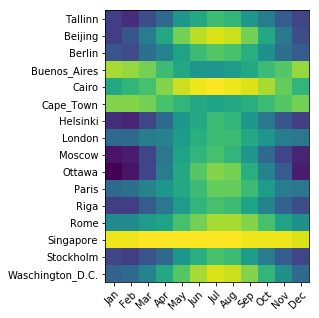

In [8]:
fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(csv)
ax.set_xticks(np.arange(len(months)))
ax.set_xticklabels(months)
ax.set_yticks(np.arange(len(cities)))
ax.set_yticklabels(cities)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

#### Heararchical clustering using <i>Single linkage (min)</i>
The result is a $4\times N$ dimensinoal array, where $N$ is the number of elements. The columns are:
1. Connected element 1
* Connected element 2
* Distance
* Number of original elements in the group

In [9]:
linked = linkage(csv, 'single')
print(len(csv))
print(linked)

16
[[ 0.          6.          3.          2.        ]
 [14.         16.          3.16227766  3.        ]
 [11.         17.          3.46410162  4.        ]
 [ 3.          5.          5.65685425  2.        ]
 [ 8.         18.          6.32455532  5.        ]
 [ 2.         20.          6.78232998  6.        ]
 [ 7.         10.          6.8556546   2.        ]
 [21.         22.          7.81024968  8.        ]
 [ 1.         15.          8.77496439  2.        ]
 [ 9.         23.          9.94987437  9.        ]
 [12.         24.         12.24744871  3.        ]
 [25.         26.         14.96662955 12.        ]
 [ 4.         27.         22.15851981 13.        ]
 [13.         28.         26.88865932 14.        ]
 [19.         29.         30.41381265 16.        ]]


#### Plot the dendograms

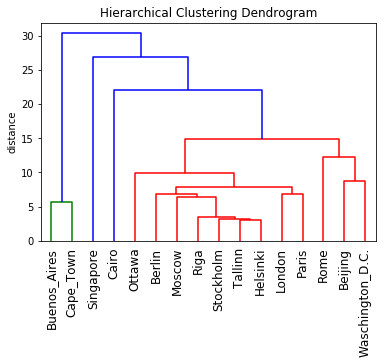

In [10]:
linked = linkage(csv, 'single')
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    linked, labels=cities,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

#### Difference between singla and complete linkage

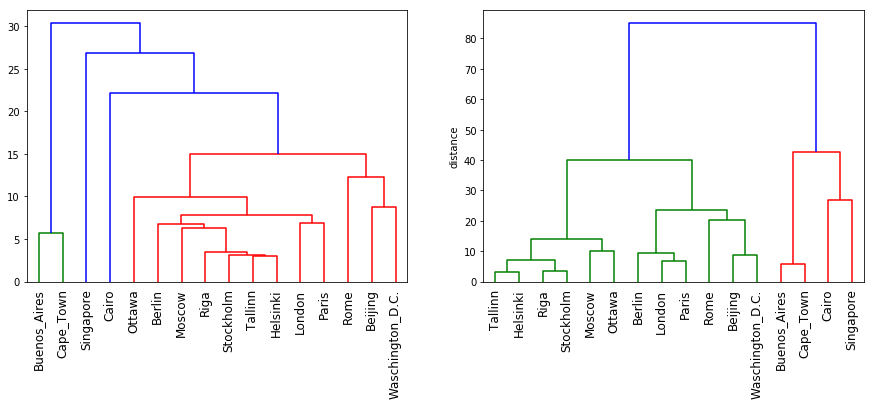

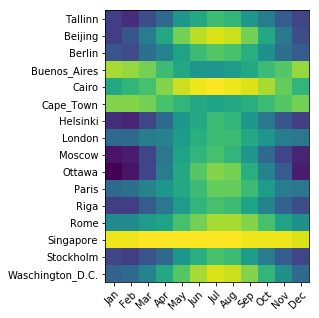

In [11]:
linkeds = linkage(csv, 'single')
linkedc = linkage(csv, 'complete')
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))
plt.ylabel('distance')
dendrogram(
    linkeds, labels=cities,
    ax = ax1,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
dendrogram(
    linkedc, labels=cities,
    ax = ax2,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.imshow(csv)
ax.set_xticks(np.arange(len(months)))
ax.set_xticklabels(months)
ax.set_yticks(np.arange(len(cities)))
ax.set_yticklabels(cities)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()

#### The other dimension, months.

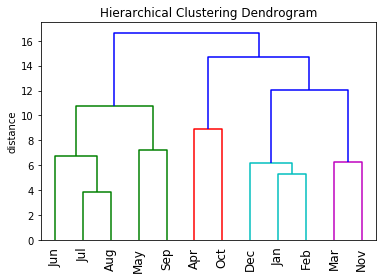

In [12]:
tcsv = np.transpose(csv)
tlinked = linkage(tcsv, 'single')

plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    tlinked, labels=months,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

#### Retrieve clusters after cut at distance

In [13]:
clusters = scipy.cluster.hierarchy.fcluster(tlinked,10,criterion='distance')
print(np.vstack((months, clusters)).T)

[['Jan' '4']
 ['Feb' '4']
 ['Mar' '5']
 ['Apr' '3']
 ['May' '2']
 ['Jun' '1']
 ['Jul' '1']
 ['Aug' '1']
 ['Sep' '2']
 ['Oct' '3']
 ['Nov' '5']
 ['Dec' '4']]


### Hirearchical clustering for networks
* We consider nodes similar if they are connected to the same neighbors.
* This is the adjacency matrix
* We have to add self links otherwise we get spurious results in sparse graphs (Similar nodes will connect to me as well, which would give a difference)

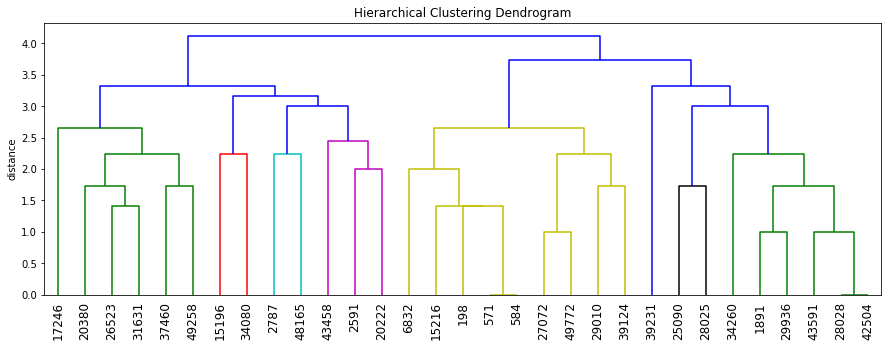

C:\Users\szmnk\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


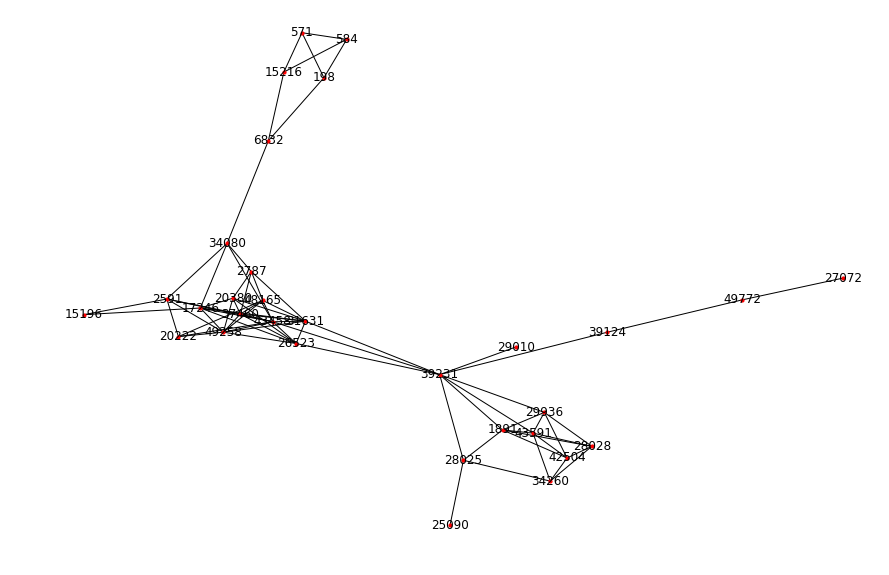

In [14]:
nl = list(G.nodes())
A = np.array(nx.adjacency_matrix(G,nodelist=nl).todense())
for i in range(len(A)):
    A[i][i] = 1 # self link
lA = linkage(A, 'complete')
plt.subplots(figsize=(15,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('distance')
dendrogram(
    lA, labels=nl,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()
plt.subplots(figsize=(15,10))
nx.draw_networkx(G, with_labels=True,node_size=10)
plt.axis('off')
plt.show()

### Exercise
1. Read the Wikipedia page Arithmetic
* Create a dictionary with words longer than 3 characters and made only of letters
  * Create an empty dictionary
  * Split the text along whitespaces
  * For words satisfying the criteria check if it is already in the dictionary, if <b>no</b> add it with number 1 if <b>yes</b> increase number by one.
* sort the dictionary according to word occurence
* print the top 10 words

In [35]:
import urllib.request
f = urllib.request.urlopen("https://en.wikipedia.org/wiki/Arithmetic")
data = f.read()
f.close()

In [36]:
wlist = {}
for w in data.split():
    if len(w) > 3 and w.isalpha():
        if w not in wlist.keys():
            wlist[w] = 1
        else:
            wlist[w] += 1
wlist

{b'sources': 12,
 b'articles': 12,
 b'incorporating': 6,
 b'citation': 6,
 b'from': 31,
 b'American': 9,
 b'Cyclopaedia': 3,
 b'with': 40,
 b'Wikisource': 3,
 b'this': 40,
 b'CentralNotice': 1,
 b'free': 2,
 b'song': 1,
 b'Brooke': 1,
 b'tables': 1,
 b'branch': 1,
 b'that': 28,
 b'consists': 1,
 b'study': 2,
 b'especially': 1,
 b'properties': 1,
 b'traditional': 1,
 b'Arithmetic': 4,
 b'elementary': 3,
 b'part': 5,
 b'number': 29,
 b'theory': 2,
 b'considered': 1,
 b'modern': 6,
 b'along': 1,
 b'terms': 3,
 b'were': 13,
 b'used': 15,
 b'until': 3,
 b'beginning': 1,
 b'synonyms': 1,
 b'sometimes': 2,
 b'still': 1,
 b'refer': 1,
 b'wider': 1,
 b'unit': 18,
 b'arithmetic': 23,
 b'compound': 16,
 b'prehistory': 1,
 b'limited': 1,
 b'small': 4,
 b'artifacts': 2,
 b'which': 19,
 b'indicate': 2,
 b'conception': 1,
 b'addition': 16,
 b'being': 2,
 b'Republic': 1,
 b'dating': 2,
 b'somewhere': 1,
 b'between': 4,
 b'although': 4,
 b'interpretation': 1,
 b'earliest': 1,
 b'written': 10,
 b'record

In [37]:
from collections import Counter

In [42]:
Counter([w for w in data.split() if len(w) > 3 and w.isalpha()]).most_common()

[(b'with', 40),
 (b'this', 40),
 (b'from', 31),
 (b'number', 29),
 (b'that', 28),
 (b'arithmetic', 23),
 (b'which', 19),
 (b'unit', 18),
 (b'compound', 16),
 (b'addition', 16),
 (b'used', 15),
 (b'multiplication', 15),
 (b'such', 14),
 (b'were', 13),
 (b'numbers', 13),
 (b'value', 13),
 (b'sources', 12),
 (b'articles', 12),
 (b'This', 12),
 (b'using', 12),
 (b'written', 10),
 (b'same', 10),
 (b'than', 10),
 (b'page', 10),
 (b'American', 9),
 (b'basic', 9),
 (b'result', 9),
 (b'various', 9),
 (b'operation', 9),
 (b'single', 9),
 (b'many', 9),
 (b'inverse', 9),
 (b'system', 8),
 (b'values', 8),
 (b'methods', 8),
 (b'their', 8),
 (b'they', 8),
 (b'also', 8),
 (b'subtraction', 8),
 (b'method', 8),
 (b'operations', 7),
 (b'ancient', 7),
 (b'units', 7),
 (b'yields', 7),
 (b'natural', 7),
 (b'example', 7),
 (b'Retrieved', 7),
 (b'incorporating', 6),
 (b'citation', 6),
 (b'modern', 6),
 (b'early', 6),
 (b'digits', 6),
 (b'different', 6),
 (b'more', 6),
 (b'each', 6),
 (b'very', 6),
 (b'symbols

#### 2nd part
Loop over the following Wikipedia pages and repeat what you have done, but save the result in the dictionary hundred where the key is the Wikipedia name

In [53]:
fields = ["Arithmetic", "Order_theory", "Algebraic_structure", "Number_theory", \
         "Field_(mathematics)", "Commutative_ring", "Commutative_algebra", \
         "Mathematical_analysis", "Combinatorics", "Geometry"]
hundred = {}


In [54]:
def wiki(string):
    f = urllib.request.urlopen("https://en.wikipedia.org/wiki/"+string)
    data = f.read()
    f.close()
    return Counter([w for w in data.split() if len(w) > 3 and w.isalpha()]).most_common(100)
for i in fields:
    #print(i)
    hundred[i] = wiki(i)

#### 3rd part
* Create a set of words (words = set())
* create a set of all words of top hundred 
<pre>
words |= set(hundred[fi].keys())
</pre>
* create a numpy array of size length of the list of words times the number of pages
* put 1 in the array whereever the word existed in the top hundred of the given page
* create a dendogram from the array

In [17]:
fields = ["Arithmetic", "Order_theory", "Algebraic_structure", "Number_theory", \
         "Field_(mathematics)", "Commutative_ring", "Commutative_algebra", \
         "Mathematical_analysis", "Combinatorics", "Geometry"]
words = set()
for i in fields:
    words.update()

#### If you prefer writers:

In [18]:
fields = ["Edgar_Allan_Poe", "Ernest_Hemingway", "George_Orwell", "James_Joyce",
         "Jane_Austen", "Charles_Dickens", "Arthur_Conan_Doyle","Oscar_Wilde",
         "Jack_London"]

#### Try out with short stories

In [19]:
fields = [ "jack-london/short-story/to-build-a-fire",
          "mark-twain/short-story/dick-bakers-cat",
         "james-joyce/short-story/eveline",
         "edgar-allan-poe/short-story/the-pit-and-the-pendulum",
         "anton-chekhov/short-story/a-blunder",
         "rudyard-kipling/short-story/how-the-camel-got-his-hump",
         "jack-london/short-story/the-story-of-keesh",
          "james-joyce/short-story/araby"
         ]
words = set()
hundred = {}
for fi in fields:
    f = urllib.request.urlopen("https://americanliterature.com/author/" + fi)
    data = f.read()
    f.close()